In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import hddm 
from patsy import dmatrix 
# print(hddm.__version__)

%matplotlib inline

## Pre-processing

In [4]:
!pwd

/Users/Krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis


In [5]:
data = hddm.load_csv('./cavanagh_theta_nn.csv')

In [6]:
data.head(10)

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.210,1.0,0.656275,1,HC
1,0,WL,1.630,1.0,-0.327889,1,LC
2,0,WW,1.030,1.0,-0.480285,1,HC
3,0,WL,2.770,1.0,1.927427,1,LC
4,0,WW,1.140,0.0,-0.213236,1,HC
5,0,WL,1.150,1.0,-0.436204,1,LC
6,0,LL,2.000,1.0,-0.274479,1,HC
7,0,WL,1.040,0.0,0.666957,1,LC
8,0,WW,0.857,1.0,0.118617,1,HC
9,0,WL,1.500,0.0,0.823626,1,LC


In [7]:
data = hddm.utils.flip_errors(data)

## Within-subjects regression 

#### Treatment specifies intercept (comparison condition) 
#### C(x) specifies categorical predictor 

##### (design matrix will auto-code dummy variables)

In [9]:
dmatrix("C(stim,Treatment('WL'))", data.head(10))

DesignMatrix with shape (10, 3)
  Intercept  C(stim, Treatment('WL'))[T.LL]  C(stim, Treatment('WL'))[T.WW]
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
  Terms:
    'Intercept' (column 0)
    "C(stim, Treatment('WL'))" (columns 1:3)

#### trialwise response ~ categorical predictor, intercept condition 

In [30]:
v_reg_model = "v ~ C(stim, Treatment('WL'))"
a_reg_model = "a ~ C(stim, Treatment('WL'))"
av_reg_model = [v_reg_model, a_reg_model]

#null: condition has no effect on drift 
null_v_reg_model = "v~1"
#null: condition has no effect on bound 
null_a_reg_model = "a~1"
#null: condition has no effect on bound/drift simultaneously estimated
null_av_reg_model = [null_v_reg_model, null_a_reg_model]

In [31]:
v_within_subj = hddm.HDDMRegressor(data, v_reg_model)
v_within_subj.sample(5000,burn=200)

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 1506.2 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [32]:
a_within_subj = hddm.HDDMRegressor(data, a_reg_model)
a_within_subj.sample(5000,burn=200)

Adding these covariates:
['a_Intercept', "a_C(stim, Treatment('WL'))[T.LL]", "a_C(stim, Treatment('WL'))[T.WW]"]


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5000 of 5000 complete in 1415.9 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [33]:
av_within_subj = hddm.HDDMRegressor(data, av_reg_model)
av_within_subj.sample(5000,burn=200)

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]
Adding these covariates:
['a_Intercept', "a_C(stim, Treatment('WL'))[T.LL]", "a_C(stim, Treatment('WL'))[T.WW]"]


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 3703.1 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


#### null models

In [34]:
null_v_within_subj = hddm.HDDMRegressor(data, null_v_reg_model)
null_v_within_subj.sample(5000,burn=200)

Adding these covariates:
['v_Intercept']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5000 of 5000 complete in 1011.9 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [35]:
null_a_within_subj = hddm.HDDMRegressor(data, null_a_reg_model)
null_a_within_subj.sample(5000,burn=200)

Adding these covariates:
['a_Intercept']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 1013.7 sec

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [ ]:
null_av_within_subj = hddm.HDDMRegressor(data, null_av_reg_model)
null_av_within_subj.sample(5000,burn=200)

Adding these covariates:
['v_Intercept']
Adding these covariates:
['a_Intercept']


/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [--                6%                  ] 320 of 5000 complete in 127.1 sec

#### plot within-subjects effects 

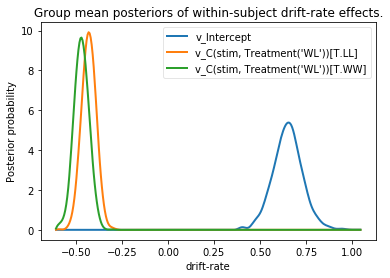

In [24]:
v_WL, v_LL, v_WW = v_within_subj.nodes_db.ix[["v_Intercept", 
                                              "v_C(stim, Treatment('WL'))[T.LL]", 
                                              "v_C(stim, Treatment('WL'))[T.WW]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')
# plt.savefig('hddm_demo_fig_07.pdf')

#### extract DIC score

In [26]:
v_within_subj.dic

10782.909186308418

#### all stats

In [ ]:
v_within_subj.print_stats()